# Explore - Exploit Methods for Multi-armed Bandit Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Bandit Class for Greedy approaches

In [2]:
class Bandit():
    
    def __init__(self, true_mean, predicted_mean):
        self.true_mean = true_mean # True mean
        self.predicted_mean = predicted_mean # Sample mean
        self.N = 0 # No. of samples collected
    
    def pull(self):
        return np.random.randn() + self.true_mean
    
    def update(self, x):
        self.N += 1
        self.predicted_mean = (1 - 1.0 / self.N) * self.predicted_mean + 1.0 / self.N * x

### BayesianBandit Class for Thompson Sampling

In [3]:
class BayesionBandit():
    
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.predicted_mean = 0
        self.lambda_ = 1
        self.sum_x = 0
        self.tau = 1
        
    def pull(self):
        return np.random.randn() + self.true_mean
    
    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean
    
    def update(self, x):
        self.lambda_ += self.tau
        self.sum_x += x
        self.predicted_mean = self.tau * self.sum_x / self.lambda_

#### Epsilon Greedy Method

In [4]:
def run_experiment_epsilon(m1, m2, m3, eps, N):
    bandits = [Bandit(m1, 0), Bandit(m2, 0), Bandit(m3, 0)]
    
    data = np.empty(N)
    
    for i in range(N):
        # Epsilon Greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.predicted_mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # For the plot
        data[i] = x
    cumulative_avg = np.cumsum(data) / (np.arange(N) + 1)
    
    # Plot moving avg ctr
    plt.plot(cumulative_avg, label='cumulative avg')
    plt.plot(np.ones(N) * m1, label='bandit 1 mean')
    plt.plot(np.ones(N) * m2, label='bandit 2 mean')
    plt.plot(np.ones(N) * m3, label='bandit 3 mean')
    plt.legend()
    plt.title('Epsilon Greedy')
    plt.xscale('log')
    plt.show()
    
    print('Epsilon Greedy')
    for b in bandits:
        print(b.predicted_mean)
    
    return cumulative_avg

#### Decaying Epsilon Greedy Method

In [5]:
def run_experiment_decaying_epsilon(m1, m2, m3, N):
    bandits = [Bandit(m1, 0), Bandit(m2, 0), Bandit(m3, 0)]
    
    data = np.empty(N)
    
    for i in range(N):
        # Epsilon Greedy
        p = np.random.random()
        if p < 1.0 / (i + 1):
            j = np.random.choice(3)
        else:
            j = np.argmax([b.predicted_mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # For the plot
        data[i] = x
        
    cumulative_avg = np.cumsum(data) / (np.arange(N) + 1)
    
    plt.plot(cumulative_avg, label='cumulative avg')
    plt.plot(np.ones(N) * m1, label='bandit 1 mean')
    plt.plot(np.ones(N) * m2, label='bandit 2 mean')
    plt.plot(np.ones(N) * m3, label='bandit 3 mean')
    plt.legend()
    plt.title('Decaying Epsilon Greedy')
    plt.xscale('log')
    plt.show()
    
    print('Decaying Epsilon Greedy')
    for b in bandits:
        print(b.predicted_mean)
    
    return cumulative_avg

#### Optimistic Initial Values Method

In [6]:
def run_experiment_optimistic(m1, m2, m3, N):
    bandits = [Bandit(m1, 10), Bandit(m2, 10), Bandit(m3, 10)]
    
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.predicted_mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # For the plot
        data[i] = x
        
    cumulative_avg = np.cumsum(data) / (np.arange(N) + 1)
    
    plt.plot(cumulative_avg, label='cumulative avg')
    plt.plot(np.ones(N) * m1, label='bandit 1 mean')
    plt.plot(np.ones(N) * m2, label='bandit 2 mean')
    plt.plot(np.ones(N) * m3, label='bandit 3 mean')
    plt.legend()
    plt.title('Optimistic Initial Values')
    plt.xscale('log')
    plt.show()
    
    print('Optimistic Initial Values')
    for b in bandits:
        print(b.predicted_mean)
    
    return cumulative_avg

#### Upper Confidence Bound Method

In [7]:
def ucb(mean, n, nj):
    if nj == 0:
        return float('inf')
    return mean + np.sqrt(2 * np.log(n) / nj)

In [8]:
def run_experiment_ucb1(m1, m2, m3, N):
    bandits = [Bandit(m1, 0), Bandit(m2, 0), Bandit(m3, 0)]
    
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([ucb(b.predicted_mean, i + 1, b.N) for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # For the plot
        data[i] = x
        
    cumulative_avg = np.cumsum(data) / (np.arange(N) + 1)
    
    plt.plot(cumulative_avg, label='cumulative avg')
    plt.plot(np.ones(N) * m1, label='bandit 1 mean')
    plt.plot(np.ones(N) * m2, label='bandit 2 mean')
    plt.plot(np.ones(N) * m3, label='bandit 3 mean')
    plt.legend()
    plt.title('UCB1')
    plt.xscale('log')
    plt.show()
    
    print('UCB1')
    for b in bandits:
        print(b.predicted_mean)
    
    return cumulative_avg

#### Bayesian Thompson Sampling Method

In [9]:
def run_experiment_bayesion_thompson_sampling(m1, m2, m3, N):
    bandits = [BayesionBandit(m1), BayesionBandit(m2), BayesionBandit(m3)]
    
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # For the plot
        data[i] = x
        
    cumulative_avg = np.cumsum(data) / (np.arange(N) + 1)
    
    plt.plot(cumulative_avg, label='cumulative avg')
    plt.plot(np.ones(N) * m1, label='bandit 1 mean')
    plt.plot(np.ones(N) * m2, label='bandit 2 mean')
    plt.plot(np.ones(N) * m3, label='bandit 3 mean')
    plt.legend()
    plt.title('Bayesion Thompson Sampling')
    plt.xscale('log')
    plt.show()
    
    print('Bayesion Thompson Sampling')
    for b in bandits:
        print(b.predicted_mean)
    
    return cumulative_avg

In [10]:
m1 = 1.0
m2 = 2.0
m3 = 3.0
eps = 0.1
N = 100000

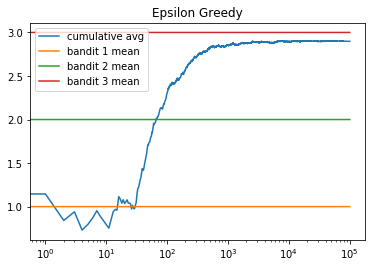

Epsilon Greedy
0.9911099414515027
2.005318331939814
3.0019242856542894


In [11]:
c_epsilon = run_experiment_epsilon(m1, m2, m3, eps, N)

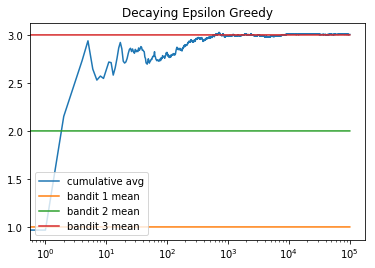

Decaying Epsilon Greedy
1.0586842435303405
2.4937651703774346
3.0046485336880555


In [12]:
c_decaying_epsilon = run_experiment_decaying_epsilon(m1, m2, m3, N)

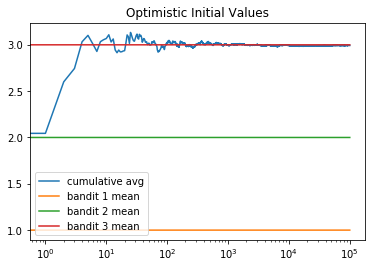

Optimistic Initial Values
1.718805895849056
2.370122119939223
2.9926967011833354


In [13]:
c_optimistic = run_experiment_optimistic(m1, m2, m3, N)

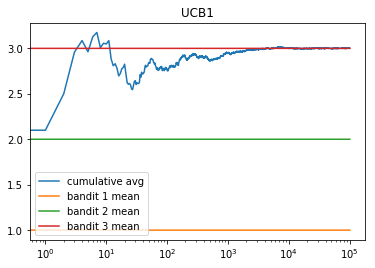

UCB1
0.5116911363148704
2.256645174512277
3.001818469442709


In [14]:
c_ucb1 = run_experiment_ucb1(m1, m2, m3, N)

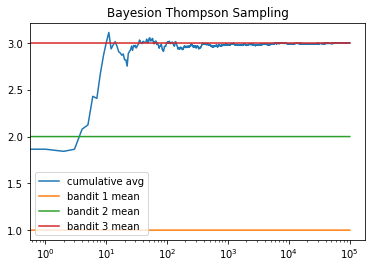

Bayesion Thompson Sampling
1.0446472869586823
1.4633124079744682
3.0010272737134196


In [15]:
c_bayesion = run_experiment_bayesion_thompson_sampling(m1, m2, m3, N)

#### Log scale plot

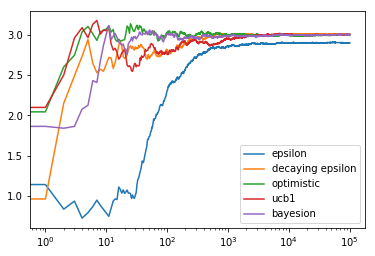

In [16]:
plt.plot(c_epsilon, label='epsilon')
plt.plot(c_decaying_epsilon, label='decaying epsilon')
plt.plot(c_optimistic, label='optimistic')
plt.plot(c_ucb1, label='ucb1')
plt.plot(c_bayesion, label='bayesion')
plt.legend()
plt.xscale('log')
plt.show()

#### Linear Scale Plot

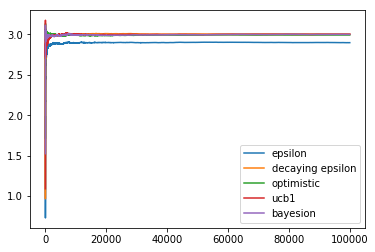

In [17]:
plt.plot(c_epsilon, label='epsilon')
plt.plot(c_decaying_epsilon, label='decaying epsilon')
plt.plot(c_optimistic, label='optimistic')
plt.plot(c_ucb1, label='ucb1')
plt.plot(c_bayesion, label='bayesion')
plt.legend()
plt.show()